## Лабораторная работа 4. Правильный многоугольник Рело. Векторизация вычислений в numpy

Орешко Алёна Владимировна, 31.03.2025

## Задание 4.2. Построение правильного многоугольника Рело

<span style="color:red;">Создайте</span> матричное описание границы правильного многоугольника Рело для произвольных значений переменных $n$, $\text{center}$, $r$, следуя аналогичным рассуждениям из Задания 4.1 (вычисление координат вершин, представление одной стороны, моделирование всей границы). Помните, что количество вершин многоугольника $n$ должно быть нечетным.

Обратите внимание, что длина стороны $l$ правильного многоугольника, на
основании которого строится многоугольник Рело, является неизвестной величиной
и должна быть выражена через количество вершин $n$ и ширину $r$ многоугольника
Рело. <span style="color:red;">Напишите</span> подробно, как получена аналитическая зависимость $l$ от $n$ и $r$. Объяснения оформите в тексте документа с лабораторной работой.

In [105]:
import numpy as np
import matplotlib.pyplot as plt

## Шаг 1: Определение переменных

In [108]:
n = 19  # кол-во вершин
center = np.array([0, 0])
r = 10. 
N = 100  # кол-во точек для одной стороны

## Шаг 2: Вычисление координат вершин правильного многоугольника

1. **Определение длины стороны**:

Длина стороны $l$ правильного многоугольника выражется через радиус описанной окружности $R$:
$$l = 2R \sin\left(\frac{\pi}{n}\right),$$
где $R$ — радиус описанной окружности:
$$R = \frac{r}{2 \sin\left(\frac{\pi}{n}\right)}$$

2. **Вычисление координат вершин**:

In [113]:
ygli = np.linspace(0, 2 * np.pi, n, endpoint=False)
vershini = r * np.column_stack((np.cos(ygli), np.sin(ygli)))

## Шаг 3: Построение сторон многоугольника

In [116]:
sides = []
colors = plt.cm.viridis(np.linspace(0, 1, n))  #генерация цветов
for i in range(n):
    side = np.array([vershini[i], vershini[(i + 1) % n]])
    sides.append((side, colors[i]))

## Шаг 4: Построение графика многоугольника

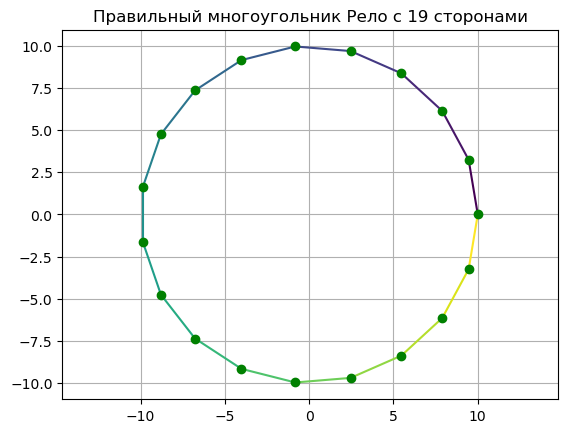

In [119]:
plt.figure()
for side, color in sides:
    plt.plot(side[:, 0], side[:, 1], color=color)  #грани разного цвета
plt.plot(vershini[:, 0], vershini[:, 1], 'go')
plt.axis('equal')
plt.title('Правильный многоугольник Рело с 19 сторонами')
plt.grid()
plt.show()

# Задание 4.3. Результирующая пользовательская функция

**а)**
<span style="color:red;">Напишите</span> пользовательскую функцию regular_polygon_Relo(n, center, r, N) на основании кода из Задания 4.2. Функция должна возвращать матрицу, каждая строка которой содержит координаты точек, описывающих границу правильного многоугольника Рело.

Аргументы пользовательской функции:
- n: количество вершин правильного многоугольника Рело; является нечетным целым числом большим 2; стандартное значение 3.
- center: массив координат центра правильного многоугольника Рело; стандартное значение np.array([0, 0]).
- r: ширина правильного многоугольника Рело; является положительным числом, стандартное значение 1.
- N: количество точек для описания одной стороны правильного многоугольника Рело; является натуральным числом; стандартное значение 100.

Код функции не должен использовать переменные из глобальной области видимости модуля. Внутри функции не должно осуществляться отображение многоугольника Рело.

**б)**
<span style="color:red;">Осуществите</span> контроль за значениями аргументов при вызове функции с помощью оператора $ assert $.

**в)**
<span style="color:red;">Укажите</span> аннотации типов и <span style="color:red;">оформите</span> строки документации. <span style="color:red;">Осуществите</span> доступ к аннотации типов и к строкам документации через атрибуты объекта функции.

**г)**
<span style="color:red;">Создайте</span> модуль $ relo.py $, в котором будет содержаться пользовательская функция regular_polygon_Relo.

In [122]:
def regular_polygon_Relo(n: int = 3, center: np.ndarray = np.array([0, 0]), r: float = 1, N: int = 100) -> np.ndarray:
    """
    Генерирует координаты точек, описывающих границу правильного многоугольника Рело.

    :param n: Количество вершин (нечетное целое число > 2), по умолчанию 3
    :param center: Координаты центра (массив numpy), по умолчанию np.array([0, 0])
    :param r: Ширина многоугольника (положительное число), по умолчанию 1
    :param N: Количество точек для одной стороны (натуральное число), по умолчанию 100
    :return: Матрица (numpy ndarray), где каждая строка содержит координаты точек границы
    """
    assert isinstance(n, int) and n > 2 and n % 2 == 1, "n должно быть нечетным целым числом больше 2"
    assert isinstance(center, np.ndarray) and center.shape == (2,), "center должен быть массивом numpy с двумя элементами"
    assert isinstance(r, (int, float)) and r > 0, "r должно быть положительным числом"
    assert isinstance(N, int) and N > 0, "N должно быть натуральным числом"
    vershini = r * np.column_stack((np.cos(ygli), np.sin(ygli))) + center
    #граничные точки
    boundary_points = []
    for i in range(n):
        start, end = vershini[i], vershini[(i + 1) % n]
        t = np.linspace(0, 1, N)
        side_points = np.outer(1 - t, start) + np.outer(t, end)
        boundary_points.append(side_points)
    return np.vstack(boundary_points)
if __name__ == "__main__":
    polygon = regular_polygon_Relo(n, center, r, N)
    print("Координаты граничных точек:")
    print(polygon)

Координаты граничных точек:
[[10.          0.        ]
 [ 9.99452699  0.03279793]
 [ 9.98905399  0.06559585]
 ...
 [ 9.98905399 -0.06559585]
 [ 9.99452699 -0.03279793]
 [10.          0.        ]]


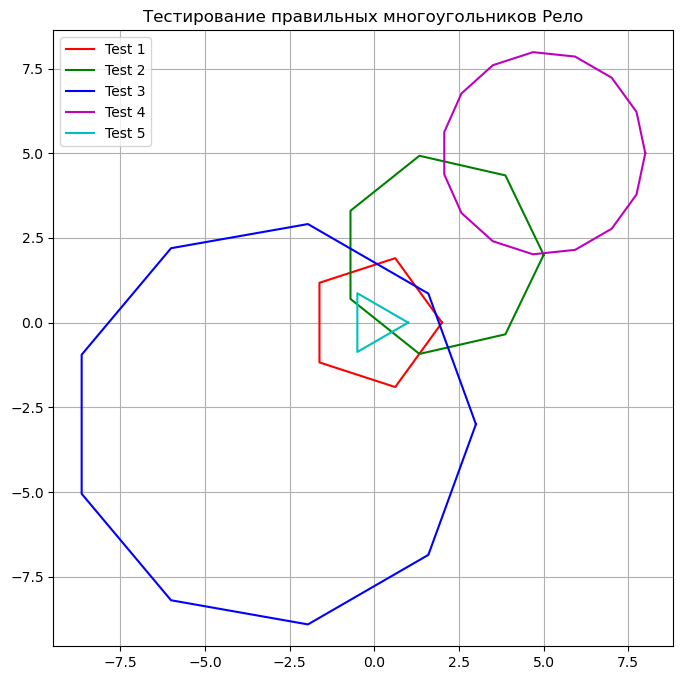

In [124]:
from relo import regular_polygon_Relo
test_cases = [
    (5, np.array([0, 0]), 2, 50),
    {"n": 7, "center": np.array([2, 2]), "r": 3, "N": 70},
    (9, np.array([-3, -3]), 6, 30),
    {"n": 15, "center": np.array([5, 5]), "r": 3, "N": 110},
    ()
]
plt.figure(figsize=(8, 8))
colors = ['r', 'g', 'b', 'm', 'c']
for i, case in enumerate(test_cases):
    try:
        points = regular_polygon_Relo(**case) if isinstance(case, dict) else regular_polygon_Relo(*case)
        plt.plot(points[:, 0], points[:, 1], color=colors[i % len(colors)], label=f"Test {i+1}")
    except AssertionError as e:
        print(f"Ошибка в тесте {i+1}: {e}")
plt.axis("equal")
plt.legend()
plt.title("Тестирование правильных многоугольников Рело")
plt.grid()
plt.show()